# Abstract

In this notebook we aim to experiment with the recreation of figures and findings from an article by Obermeyer et al (2019). The work is done to analyze an algorithm that gave black patients lower scores based on the thought that black patients were healthier than white patients due to less money being spent on them. In this work I was able to successfully recreate figures 1 and 3 and eventually produce similar findings regarding the relationship between medical expenditures for black and white patients.

In [1]:
import pandas as pd
url = "https://gitlab.com/labsysmed/dissecting-bias/-/raw/master/data/data_new.csv?inline=false"
df = pd.read_csv(url)

In [32]:
rs_male = df.loc[df['dem_female'] == 0]
rs_female = df.loc[df['dem_female'] == 1]

# Figure 1 Recreation

In [109]:
rs_male = rs_male.copy()
rs_male_b = rs_male.loc[rs_male['race'] == 'black']
rs_male_w = rs_male.loc[rs_male['race'] == 'white']
rs_male_b = rs_male_b.copy()
rs_male_w = rs_male_w.copy()
rs_male_b['risk_percent'] = (rs_male_b['risk_score_t'].rank(pct=True) * 100).round()
rs_male_w['risk_percent'] = (rs_male_w['risk_score_t'].rank(pct=True) * 100).round()
rs_male_b['mean_chronic'] = rs_male_b.groupby('risk_percent')['gagne_sum_t'].transform('mean')
rs_male_w['mean_chronic'] = rs_male_w.groupby('risk_percent')['gagne_sum_t'].transform('mean')

In [110]:
rs_female = rs_female.copy()
rs_female_b = rs_female.loc[rs_female['race'] == 'black']
rs_female_w = rs_female.loc[rs_female['race'] == 'white']
rs_female_b = rs_female_b.copy()
rs_female_w = rs_female_w.copy()
rs_female_b['risk_percent'] = (rs_female_b['risk_score_t'].rank(pct=True) * 100).round()
rs_female_w['risk_percent'] = (rs_female_w['risk_score_t'].rank(pct=True) * 100).round()
rs_female_b['mean_chronic'] = rs_female_b.groupby('risk_percent')['gagne_sum_t'].transform('mean')
rs_female_w['mean_chronic'] = rs_female_w.groupby('risk_percent')['gagne_sum_t'].transform('mean')

In [111]:
rs_male = pd.concat([rs_male_b, rs_male_w])
rs_female = pd.concat([rs_female_b, rs_female_w])

Text(0, 0.5, 'Percentile Risk Score')

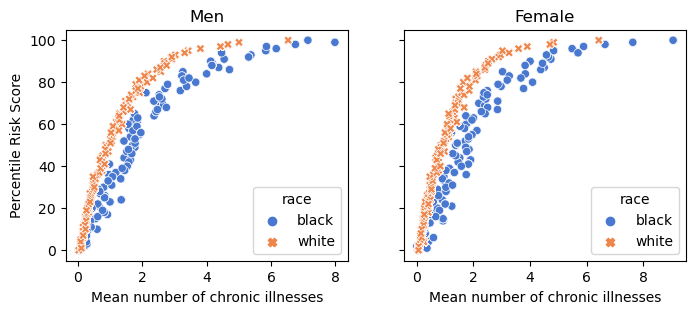

In [216]:
import seaborn as sns
from matplotlib import pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(8,3), sharey=True)

sns.scatterplot(ax=axs[0], data=rs_male[['risk_percent', 'mean_chronic', 'race']], x='mean_chronic', y='risk_percent', hue='race', style='race', palette='muted')
sns.scatterplot(ax=axs[1], data=rs_female[['risk_percent', 'mean_chronic', 'race']], x='mean_chronic', y='risk_percent', hue='race', style='race', palette='muted')
axs[0].set_xlabel("Mean number of chronic illnesses")
axs[1].set_xlabel("Mean number of chronic illnesses")
axs[0].set_title("Men")
axs[1].set_title("Female")
axs[0].set_ylabel("Percentile Risk Score")

### Plot Discussion

The following plots show the difference between black and white patients in regard to their percentile risk score compared to their average number of chronic illnesses. From looking at both plots within male and female populations white patients have a higher likelihood of getting treatment as they have higher risk scores at similar chronic illness levels.

# Figure 3 Recreation

In [188]:
rs_b = df.loc[df['race'] == 'black']
rs_w = df.loc[df['race'] == 'white']
rs_b = rs_b.copy()
rs_w = rs_w.copy()
rs_b['risk_percent'] = (rs_b['risk_score_t'].rank(pct=True) * 100).round()
rs_w['risk_percent'] = (rs_w['risk_score_t'].rank(pct=True) * 100).round()
rs_b['total_medical_cost'] = rs_b.groupby('risk_percent')['cost_t'].transform('mean')
rs_w['total_medical_cost'] = rs_w.groupby('risk_percent')['cost_t'].transform('mean')
rs = pd.concat([rs_b, rs_w])

In [190]:
rs_b['illness_cost'] = rs_b.groupby('gagne_sum_t')['cost_t'].transform('mean')
rs_w['illness_cost'] = rs_w.groupby('gagne_sum_t')['cost_t'].transform('mean')
rs = pd.concat([rs_b, rs_w])

In [182]:
rs

,risk_score_t,program_enrolled_t,cost_t,cost_avoidable_t,bps_mean_t,ghba1c_mean_t,hct_mean_t,cre_mean_t,ldl_mean_t,race,...,trig_mean-high_tm1,trig_mean-normal_tm1,trig_max-low_tm1,trig_max-high_tm1,trig_max-normal_tm1,gagne_sum_tm1,gagne_sum_t,risk_percent,total_medical_cost,illness_cost
8,1.087141,0,1000.0,0.0,118.0,5.800000,39.1,0.490,78.0,black,...,0,1,1,0,1,1,1,17.0,229100.0,6783200.0
20,11.092237,0,2900.0,0.0,124.0,NaN,NaN,NaN,NaN,black,...,0,0,0,0,0,4,2,90.0,547200.0,6172200.0
23,0.611517,0,1900.0,400.0,106.0,NaN,NaN,NaN,NaN,black,...,0,1,0,0,1,0,0,8.0,56700.0,5799000.0
30,4.552404,0,1900.0,100.0,140.0,6.233333,40.8,1.000,81.0,black,...,0,0,1,0,0,1,1,65.0,324400.0,6783200.0
47,1.885510,0,2000.0,0.0,123.0,NaN,37.9,0.955,NaN,black,...,0,0,0,0,0,1,1,32.0,202200.0,6783200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48779,0.611517,0,800.0,0.0,NaN,NaN,NaN,1.090,148.0,white,...,0,0,0,0,0,0,0,7.0,957800.0,89457400.0
48780,2.615933,0,2200.0,0.0,112.0,NaN,41.4,0.810,172.0,white,...,0,1,0,0,1,1,1,46.0,2456500.0,63470100.0
48781,1.358926,0,800.0,0.0,105.0,NaN,NaN,NaN,NaN,white,...,0,1,0,0,1,1,0,23.0,1989700.0,89457400.0
48782,10.990318,0,1300.0,0.0,132.0,NaN,NaN,NaN,NaN,white,...,0,0,0,0,0,3,3,94.0,6924300.0,33040500.0


Text(0.5, 0, 'Number of Chronic Illnesses')

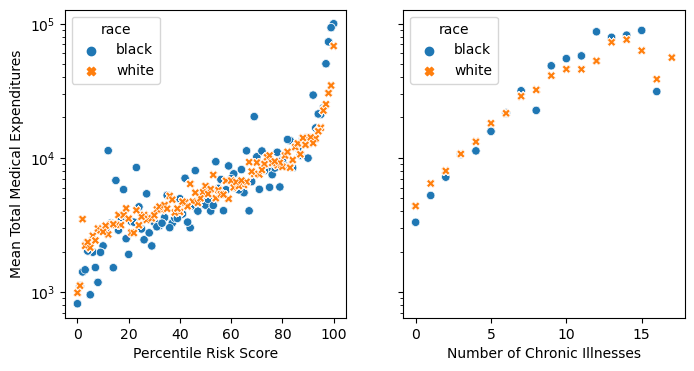

In [205]:
fig, axs = plt.subplots(1, 2, figsize=(8,4), sharey=True)

sns.scatterplot(ax=axs[0], data=rs[['risk_percent', 'total_medical_cost', 'race']], x='risk_percent', y='total_medical_cost', hue='race', style='race')
sns.scatterplot(ax=axs[1], data=rs[['illness_cost', 'gagne_sum_t', 'race']], x='gagne_sum_t', y='illness_cost', hue='race', style='race')
axs[0].set_yscale('log')
axs[0].set_ylabel('Mean Total Medical Expenditures')
axs[0].set_xlabel('Percentile Risk Score')
axs[1].set_xlabel('Number of Chronic Illnesses')

### Model Discussion

Looking at the above plot we can see that generally total expenditures increase with the number of chronic illnesses and percentile risk score. However it seems that at lower chronic illness amounts white patients have higher medical expenses than black patients. This is especially interesting given that the major of patients in the study have 5 or fewer illnesses.

# Modeling Cost Disparity

In [146]:
len(df.loc[df['gagne_sum_t'] <= 5])/len(df)

0.9553952115447688

It looks like 95% of the data is made up of patients with 5 or fewer chronic conditions.

In [147]:
df_sub = df.drop(df[df['cost_t'] == 0].index)

In [153]:
import numpy as np
df_sub['log_transform'] = np.log(df['cost_t'])

/Users/ethanlavallee/anaconda3/envs/ml-0451/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [159]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# le.fit(df_sub["race"])

# df_sub['encoded_race'] = le.transform(df_sub["race"])
df_sub['encoded_race'] = df_sub.apply( lambda df_sub: (0 if df_sub['race'] == 'white' else 1), axis=1)
df_sub

,risk_score_t,program_enrolled_t,cost_t,cost_avoidable_t,bps_mean_t,ghba1c_mean_t,hct_mean_t,cre_mean_t,ldl_mean_t,race,...,trig_mean-low_tm1,trig_mean-high_tm1,trig_mean-normal_tm1,trig_max-low_tm1,trig_max-high_tm1,trig_max-normal_tm1,gagne_sum_tm1,gagne_sum_t,log_transform,encoded_race
0,1.987430,0,1200.0,0.0,NaN,5.4,NaN,1.110000,194.0,white,...,0,0,0,0,0,0,0,0,7.090077,0
1,7.677934,0,2600.0,0.0,119.0,5.5,40.4,0.860000,93.0,white,...,0,0,1,0,0,1,4,3,7.863267,0
2,0.407678,0,500.0,0.0,NaN,NaN,NaN,NaN,NaN,white,...,0,0,0,0,0,0,0,0,6.214608,0
3,0.798369,0,1300.0,0.0,117.0,NaN,NaN,NaN,NaN,white,...,0,0,0,0,0,0,0,0,7.170120,0
4,17.513165,0,1100.0,0.0,116.0,NaN,34.1,1.303333,53.0,white,...,0,0,0,0,0,0,1,1,7.003065,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48779,0.611517,0,800.0,0.0,NaN,NaN,NaN,1.090000,148.0,white,...,0,0,0,0,0,0,0,0,6.684612,0
48780,2.615933,0,2200.0,0.0,112.0,NaN,41.4,0.810000,172.0,white,...,0,0,1,0,0,1,1,1,7.696213,0
48781,1.358926,0,800.0,0.0,105.0,NaN,NaN,NaN,NaN,white,...,0,0,1,0,0,1,1,0,6.684612,0
48782,10.990318,0,1300.0,0.0,132.0,NaN,NaN,NaN,NaN,white,...,0,0,0,0,0,0,3,3,7.170120,0


In [161]:
X = df_sub[['encoded_race', 'gagne_sum_t']]
y = df_sub['log_transform']

In [162]:
def add_polynomial_features(X, degree):
  X_ = X.copy()
  for j in range(1, degree):
    X_[f"poly_{j}"] = X_["gagne_sum_t"]**j
  return X_

In [163]:
X1 = add_polynomial_features(X, 1)
X2 = add_polynomial_features(X, 2)
X3 = add_polynomial_features(X, 3)
X4 = add_polynomial_features(X, 4)

In [217]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
LR = LinearRegression()

for i in range(10):
    Xn = add_polynomial_features(X,i)
    LR.fit(Xn, y)
    cv_scores_LR = cross_val_score(LR, Xn, y, cv = 5)
    print(f'{cv_scores_LR.mean()} {i}')



0.14538846793594346 0
0.14538846793594346 1
0.14537952700038775 2
0.14699336604386143 3
0.146909632661908 4
0.1473340656385787 5
0.14776094174784324 6
0.1480739986116853 7
0.14811660549076067 8
0.14820529985520275 9


In [169]:
LR.fit(add_polynomial_features(X, 3), y)
LR.coef_

array([-2.66242046e-01, -2.04644178e+10,  2.04644178e+10, -7.24885394e-03])

In [218]:
np.e**LR.coef_[0]

0.7653993676474179

The cost incurred by Black patients is about 77% that of White patients. Which tracks with the findings in the Obermeyer et al (2019). paper which says that there is a bias in the data where there is a correlation between race and cost where Black patients generate lower costs than Whites.

# Discussion

From the experimentation done in this work, we were able to recreate the figures and findings produced by Obermeyer et al (2019). Through this work I was able to better understand the work that was done by the researchers and to become more confident organizing data into interpretable plots. A major issue in the algorithm was that is was using medical cost as a proxy for health. While it seemed at first that this was actually a fine decision it was found that this approach was improperly calibrated, so improper on the basis of sufficiency. The lack in sufficiency for the model didn't take into account that black patients had less money spent on them which led to an assumption that black patients were healthier.